In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn import metrics




In [5]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 34.9MB/s]


In [6]:
!unzip /content/diabetes-prediction-dataset.zip

Archive:  /content/diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


In [7]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [9]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [15]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

In [8]:
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [10]:
df['diabetes'].value_counts()

,count
diabetes,
0,91500
1,8500


In [19]:
x = df[['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']]
y = df['diabetes']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

###Exercise 2

In [20]:
#Binary classification

scalar = StandardScaler()

features_scale = ['age','bmi','HbA1c_level','blood_glucose_level']
x_train[features_scale] = scalar.fit_transform(x_train[features_scale])
x_test[features_scale] = scalar.transform(x_test[features_scale])

###Exercise 3

In [21]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [23]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9603


<Axes: >

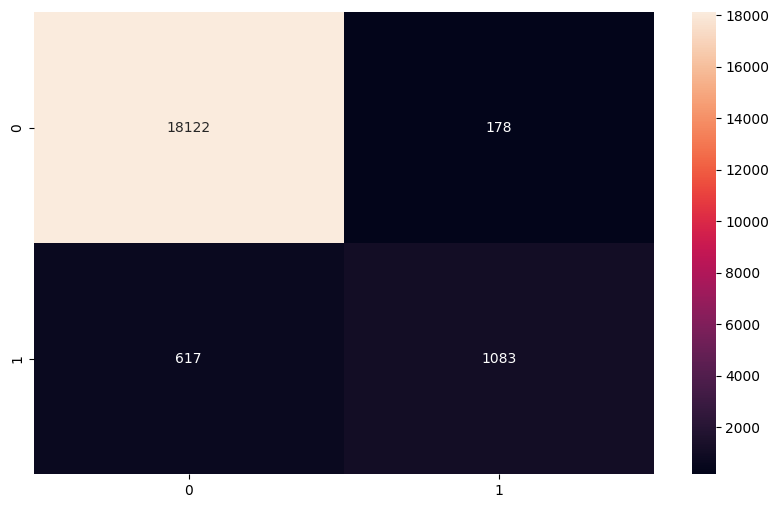

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),fmt='d', annot=True)

In [38]:
report = classification_report(y_test, y_pred, output_dict=True)
print(report)

{'0': {'precision': 0.9670740167564972, 'recall': 0.9902732240437159, 'f1-score': 0.978536137584708, 'support': 18300.0}, '1': {'precision': 0.8588421887390959, 'recall': 0.6370588235294118, 'f1-score': 0.7315096251266464, 'support': 1700.0}, 'accuracy': 0.96025, 'macro avg': {'precision': 0.9129581027477965, 'recall': 0.8136660237865638, 'f1-score': 0.8550228813556773, 'support': 20000.0}, 'weighted avg': {'precision': 0.9578743113750181, 'recall': 0.96025, 'f1-score': 0.9575388840257728, 'support': 20000.0}}


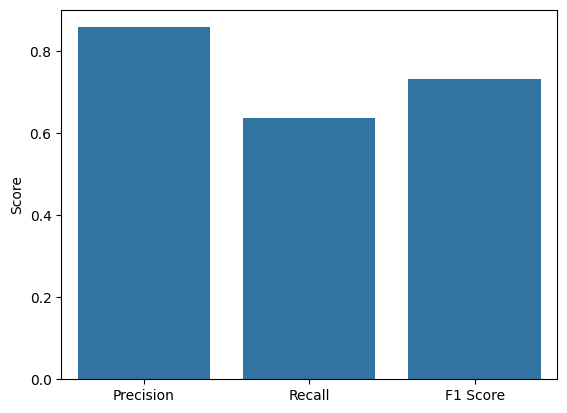

In [33]:
precision_0 = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

sns.barplot(x=['Precision', 'Recall', 'F1 Score'], y=[precision, recall, f1])
plt.ylabel('Score')
plt.show()


We have a high precision score so the model is good at making correct predictions.

Considering we are predicting medical diagnosis, the recall isn't particularly good. It could be missing too many true positives.

The F1 score is fairly low giventhe context of the data so it is not balancing the precision and recall well.

In [40]:
precision_0 = report['0']['precision']
recall_0 = report['0']['recall']
f1_score_0 = report['0']['f1-score']
support_0 = report['0']['support']


precision_1 = report['1']['precision']
recall_1 = report['1']['recall']
f1_score_1 = report['1']['f1-score']
support_1 = report['1']['support']

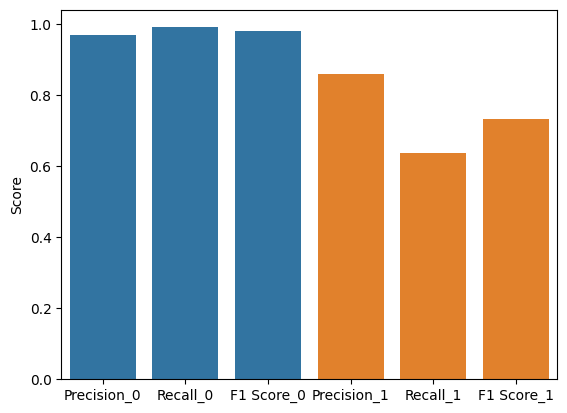

In [41]:
sns.barplot(x=['Precision_0', 'Recall_0', 'F1 Score_0'], y=[precision_0, recall_0, f1_score_0])
sns.barplot(x=['Precision_1', 'Recall_1', 'F1 Score_1'], y=[precision_1, recall_1, f1_score_1])
plt.ylabel('Score')
plt.show()

Breaking the report into No Diabetes (0) and Diabetes (1), it appears that the prediciton of no diabetes is very accurate with high recall and F1 values so the model is solid. The prediction of diabetes is not very good and has much lower values across the board.

###Exercise 5

In [44]:
x_min = x.iloc[:, 0].min() - 1  # Use .iloc for integer-based indexing
x_max = x.iloc[:, 0].max() + 1

y_min = x.iloc[:, 1].min() - 1
y_max = x.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but LogisticRegression is expecting 8 features as input.

###Exercise 6

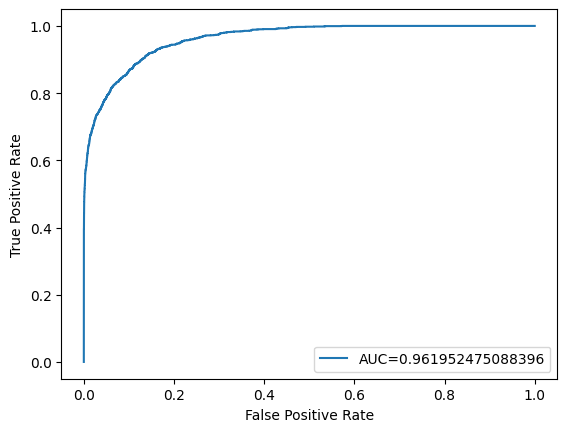

In [51]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()